### Computational Economics
Alexander Skorobogatov

# Seminar 4.2
This seminar is devoted to symbolic calculations. For related materials when preparing the assignments, please see [Topic 4.1](https://github.com/askorobogat/CompEcon/blob/main/Topic%204.1.%20Optimal%20saving.ipynb) and [Topic 4.2](https://github.com/askorobogat/CompEcon/blob/main/Topic%204.2.%20Optimal%20saving%20with%20wage.ipynb).

### Symbolic calculations using sympy
1.  An introductory exercise using a familiar material from microeconomics. Using the consumer model derive demand functions for two goods. Try the three methods of solving. For the problem and methods, see [H. Varian' textbook](https://faculty.ksu.edu.sa/sites/default/files/microeco-_varian.pdf), pp. 93-94.
2. To get an idea of the solution, create numerical examples of the derived solutions and visualize the relationships among the demands and prices, income and any of the parameters (c or d).
3. Derive an optimal consumption/saving paths based on a bit different assumption that the individual, in addition to wage and interest yield, gets an unconditional income ('inc'). For step-by-step procedure, pleese see [Topic 4.1](https://github.com/askorobogat/CompEcon/blob/main/Topic%204.1.%20Optimal%20saving.ipynb)


### Numerical examples to get an idea of the solution
4. Visualize the optimal paths of consumption, saving and capital for dict1: $ x_0,x_T,w,inc = 0, T = 500, r = 0.01, \rho = 0.005 $.
5. Change inc for 100 leaving the remaining parameters in dict1. Present new graphs next to the previous ones to see the difference. Discuss.
6. Change T for 1000 with the others as in dict1. Present new graphs next to the previous ones to see the difference. Discuss.
7. Change r for 0.05 with the others as in dict1. Present new graphs next to the previous ones to see the difference. Discuss.
8. Change rho for 0.05 with the others as in dict1. Present new graphs next to the previous ones to see the difference. Discuss.

### Symbolic

[c*m/(p1*(c + d)), d*m/(p2*(c + d))]
[c*m/(p1*(c + d)), d*m/(p2*(c + d))]
[c*m/(p1*(c + d)), d*m/(p2*(c + d))]
[5.00000000000000, 7.00000000000000]


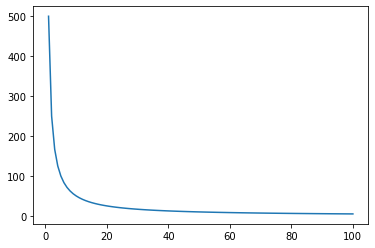

In [2]:
# Артём Борисов, [17.10.2022 11:24]
from sympy import *
import matplotlib.pyplot as pl

# Task 1.1
x1, x2, c, d, p1, p2, m, lambd,u = symbols('x1, x2, c, d, p1, p2, m, lambd,u')
u = Function("u")(x1,x2)
u = c * ln(x1) + d * ln(x2)
const = Eq(p1*x1 + p2*x2,m)

# First Option: through MRS Condtion
a = Eq((p1)/p2,(c*x2)/(d*x1))
b = Eq((p1)*(x1) + (p2)*(x2),m)
x_11 = solve(a,x1)[0]
x_12 = solve(b,x1)[0]
x2_sol = solve(Eq(x_11,x_12),x2)[0]
x1_sol = x_11.subs(x2,x2_sol)

# Вектор оптимальных значений
sol = [x1_sol ,x2_sol]
print(sol)

# Second option: through unconditional optimization
q = solve(const,x2)[0]
u_n = u.subs(x2,q)
u_d = u_n.diff(x1)
x1_sol = solve(Eq(u_d,0),x1)[0]
x2_sol = q.subs(x1,x1_sol)
x2_sol = x2_sol.simplify()
print([x1_sol ,x2_sol])

# Third option: through Lagrangian
L = c * ln(x1) + d * ln(x2) - lambd * (p1*x1 + p2*x2 - m)
e = solve(Eq(diff(L,x1),0),lambd)[0]
r = solve(Eq(diff(L,x2),0),lambd)[0]
x = solve(Eq(e,r),x1)[0]
l = solve(Eq(diff(L,lambd),0),x1)[0]
x2_sol = solve(Eq(x,l),x2)[0]
x1_sol = x.subs(x2,x2_sol)
print([x1_sol ,x2_sol.simplify()])

#Task 1.2

# Numerical examples
from numpy import linspace
x1_num1 = x1_sol.subs([(p1,10),(p2,20),(c,0.5),(d,0.5),(m,100)])
x1_num2 = x1_sol.subs([(p1,10),(p2,20),(c,0.7),(d,0.3),(m,100)])
print([x1_num1,x1_num2])

# При прочих равных, зависимость x1 от цены p1
x1_vis = x1_sol.subs([(p2,10),(m,1000),(c,0.5),(d,0.5)])
x1n = lambdify(p1,x1_vis,modules=["numpy"])
pVals = linspace(1,100,100)
pl.plot(pVals,x1n(pVals))

x1**a*x2**b
a*m/(p1*(a + b))
b*m/(p2*(a + b))
x1**a*x2**b
a*m/(p1*(a + b))
b*m/(p2*(a + b))
a*m/(p1*(a + b))
b*m/(p2*(a + b))
x1**0.5*x2**0.5
m/(2*p1)
m/(2*p2)


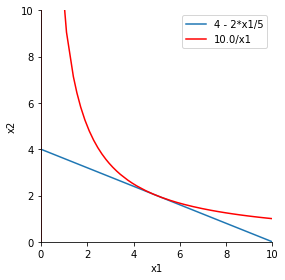

In [3]:
# Dariana Frolova, [17.10.2022 11:35]
# Task 1 

## First
from sympy import diff, symbols, Eq, solve, Function, simplify
x1,x2,a,b,p1,p2,m,lamda = symbols('x1 x2 a b p1 p2 m lamda')
U = Function('U')(x1,x2)
U = x1**a*x2**b
MRS = diff(U,x1)/diff(U,x2)
MRS
x1 = solve(MRS-p1/p2, x1)[0]
x22 = solve(p1*x1+p2*x2-m, x2)[0]
x11 = x1.subs(x2, x22)
print(U,x11,x22, sep = '\n')

## Second

x1,x2,a,b,p1,p2,m,lamda = symbols('x1 x2 a b p1 p2 m lamda')
U = x1**a*x2**b
L = U - lamda*x1*p1-lamda*x2*p2 + lamda*m
lamda1 = solve(diff(L,x1),lamda)[0]
lamda2 = solve(diff(L,x2), lamda)[0]
x1 = solve(lamda1-lamda2, x1)[0]
x22 = solve(p1*x1+p2*x2-m, x2)[0]
x11 = x1.subs(x2, x22)
print(U,x11,x22, sep = '\n')

## Third

x1,x2,a,b,p1,p2,m,lamda = symbols('x1 x2 a b p1 p2 m lamda')
U = x1**a*x2**b
constr = Eq(m, p1*x1 + p2*x2)
x2_expres = solve(constr,x2)[0]
U = U.subs(x2,x2_expres)
x1_sol = solve(Eq(diff(U,x1),0),x1)[0]
x2_sol = x2_expres.subs(x1, x1_sol).simplify()
print(x1_sol, x2_sol, sep = '\n')

# Task 2
## To get an idea of the solution, create numerical examples of the derived solutions and visualize the relationships among the demands and prices, income and any of the parameters (c or d).

x1,x2,a,b,p1,p2,m,lamda = symbols('x1 x2 a b p1 p2 m lamda')
U = x1**(0.5)*x2**(0.5)
L = U - lamda*x1*p1-lamda*x2*p2 + lamda*m
lamda1 = solve(diff(L,x1),lamda)[0]
lamda2 = solve(diff(L,x2), lamda)[0]
x1 = solve(lamda1-lamda2, x1)[0]
x22 = solve(p1*x1+p2*x2-m, x2)[0]
x11 = x1.subs(x2, x22)
print(U,x11,x22, sep = '\n')

val = {p1:2, p2:5, m:20}

x1_sol = x11.subs(val)
x2_sol = x22.subs(val)

x1, x2 = symbols('x1 x2')
constr = Eq(m, p1*x1 + p2*x2)
g = solve(constr,x2)[0].subs(val)
U = x1**(0.5)*x2**(0.5)
U_const = U.subs({x1:x1_sol, x2:x2_sol})
c = solve(Eq(U, U_const),x2)[0]

from sympy.plotting import plot
pl1 = plot(g,xlabel=x1,ylabel=x2,xlim=(0,10),ylim=(0,10),axis_center=(0,0),aspect_ratio=(1,1),legend=True,show=False)
pl2 = plot(c,line_color='red',legend=True,show=False)
pl1.append(pl2[0])
pl1.show()

In [5]:
# Никита, [17.10.2022 12:17]
# 1
x1, x2, c, d, p1, p2, lamda, m = symbols('x1 x2 c d p1 p2 lamda m') 
x1 = (m-p2*x2)/p1 
uln = c*ln(x1) + d*ln(x2) 
dx = diff(uln, x2) 
solx2 = solve(Eq(dx, 0), x2)[0] 
solx1 = solve(Eq(x1, (m-p2*solx2)/p1), x1)[0] 
print(solx1) 
print(solx2)


c*m/(p1*(c + d))
d*m/(p2*(c + d))


First solution
c*m/(p1*(c + d)), d*m/(p2*(c + d))

Second solution
c*m/(p1*(c + d)), d*m/(p2*(c + d))

Third solution
c*m/(p1*(c + d)), d*m/(p2*(c + d))
Utility function = x1**0.5*x2**0.5
x1* = m/(2*p1)
x2* = m/(2*p2)


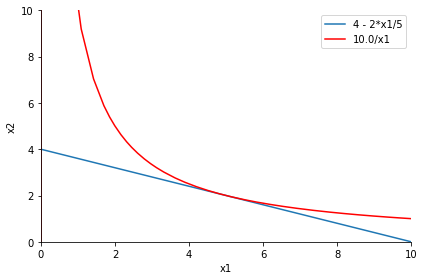

In [6]:
# Egor Titov, [17.10.2022 12:36]
#TASK 1.1
x1, x2, c, d, p1, p2, m, l = symbols('x1, x2, c, d, p1, p2, m, l')

u = Function('U')(x1, x2)

u = c * ln(x1) + d * ln(x2)
const = Eq(p1*x1 + p2*x2,m)

# First sol
a = Eq(p1/p2,(c*x2)/(d*x1))
b = Eq(p1*x1 + p2*x2, m)

x_11 = solve(a, x1)[0]
x_12 = solve(b, x1)[0]
x2_sol = solve(Eq(x_11, x_12), x2)[0]
x1_sol = x_11.subs(x2, x2_sol)

print('First solution')
print(x1_sol, x2_sol, sep=', ')
print()

#Second sol
L = c * ln(x1) + d * ln(x2) - l * (p1*x1 + p2*x2 - m)

e = solve(Eq(diff(L, x1), 0), l)[0]
r = solve(Eq(diff(L, x2), 0), l)[0]
x = solve(Eq(e, r), x1)[0]
l = solve(Eq(diff(L, l), 0), x1)[0]

x2_sol = solve(Eq(x, l), x2)[0]
x1_sol = x.subs(x2, x2_sol)

print('Second solution')
print(x1_sol, x2_sol.simplify(), sep=', ')
print()

#Third sol
q = solve(const,x2)[0]

u_n = u.subs(x2,q)
u_d = u_n.diff(x1)

x1_sol = solve(Eq(u_d,0),x1)[0]
x2_sol = q.subs(x1,x1_sol)
x2_sol = x2_sol.simplify()

print('Third solution')
print(x1_sol ,x2_sol, sep=', ')

#TASK 1.2

from sympy.plotting import plot
#symbols
x1, x2, a, b, p1, p2, m, lamda = symbols('x1 x2 a b p1 p2 m lamda')

#utility function and lagrangian
U = (x1**(0.5))*(x2**(0.5))
L = U - lamda*x1*p1 - lamda*x2*p2 + lamda*m

#solve for lambdas
lamda1 = solve(diff(L, x1), lamda)[0]
lamda2 = solve(diff(L, x2), lamda)[0]

#solve vor x1, x2
x1 = solve(lamda1-lamda2, x1)[0]
x22 = solve(p1*x1+p2*x2-m, x2)[0]
x11 = x1.subs(x2, x22)

print(f"Utility function = {U}", f"x1* = {x11}", f"x2* = {x22}", sep = '\n')

val = {p1:2, p2:5, m:20}

x1_sol = x11.subs(val)
x2_sol = x22.subs(val)

#symbols and constraint
x1, x2 = symbols('x1 x2')
constr = Eq(m, p1*x1 + p2*x2)

g = solve(constr, x2)[0].subs(val)

U = (x1**(0.5))*(x2**(0.5))
U_const = U.subs({x1:x1_sol, x2:x2_sol})

c = solve(Eq(U, U_const),x2)[0]

#plot g
pl1 = plot(g, xlabel=x1,ylabel=x2, xlim=(0, 10), ylim=(0, 10), axis_center=(0, 0),
           spect_ratio=(1, 1), legend=True, show=False)

#plot c
pl2 = plot(c, line_color='red', legend=True, show=False)
pl1.append(pl2[0])
pl1.show()

In [7]:
#Alexander Kurylev, [17.10.2022 12:55]
#1.1
x1, x2, c, d, p1, p2, m, lam = symbols('x1, x2, c, d, p1, p2, m, lam')
u = Function('u')(x1, x2)
u = c * ln(x1) + d * ln(x2)
const = Eq(p1*x1 + p2*x2,m)
# 1
L = c * ln(x1) + d * ln(x2) - lam * (p1*x1 + p2*x2 - m)
e = solve(Eq(diff(L, x1), 0), lam)[0]
r = solve(Eq(diff(L, x2), 0), lam)[0]
x = solve(Eq(e, r), x1)[0]
l = solve(Eq(diff(L, lam), 0), x1)[0]
x2_sol = solve(Eq(x, lam), x2)[0]
x1_sol = x.subs(x2, x2_sol)
print('1 sol:')
solution1 = x1_sol, x2_sol
print(solution1)
#2
a = Eq(p1/p2,(c*x2)/(d*x1))
b = Eq((p1)*(x1) + (p2)*(x2),m)
x_11 = solve(a, x1)[0]
x_12 = solve(b, x1)[0]
x2_sol = solve(Eq(x_11, x_12), x2)[0]
x1_sol = x_11.subs(x2, x2_sol)
print('2 sol:')
solution2 = x1_sol ,x2_sol
print(solution2)
#3
q = solve(const,x2)[0]
u_n = u.subs(x2,q)
u_d = u_n.diff(x1)
x1_sol = solve(Eq(u_d,0),x1)[0]
x2_sol = q.subs(x1,x1_sol)
x2_sol = x2_sol.simplify()
print('3 sol:')
solution3 = x1_sol ,x2_sol
print(solution3)


1 sol:
(lam, d*lam*p1/(c*p2))
2 sol:
(c*m/(p1*(c + d)), d*m/(p2*(c + d)))
3 sol:
(c*m/(p1*(c + d)), d*m/(p2*(c + d)))


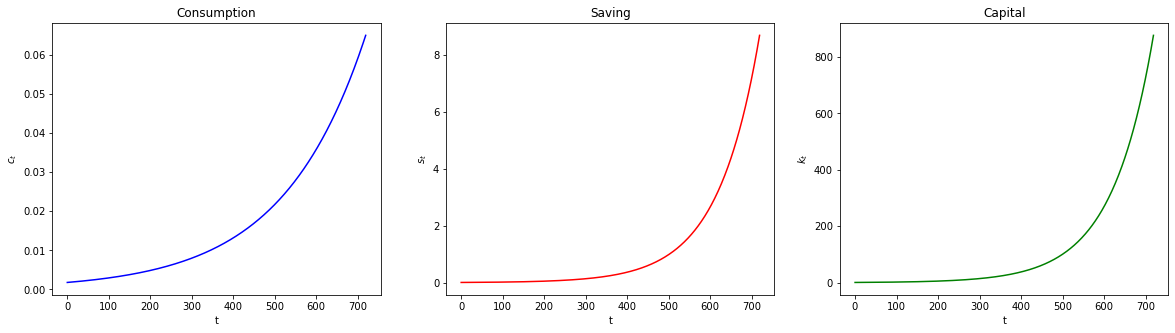

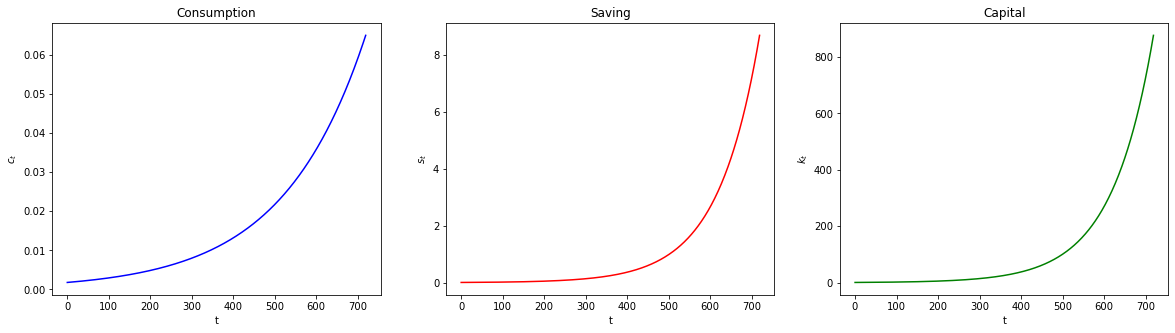

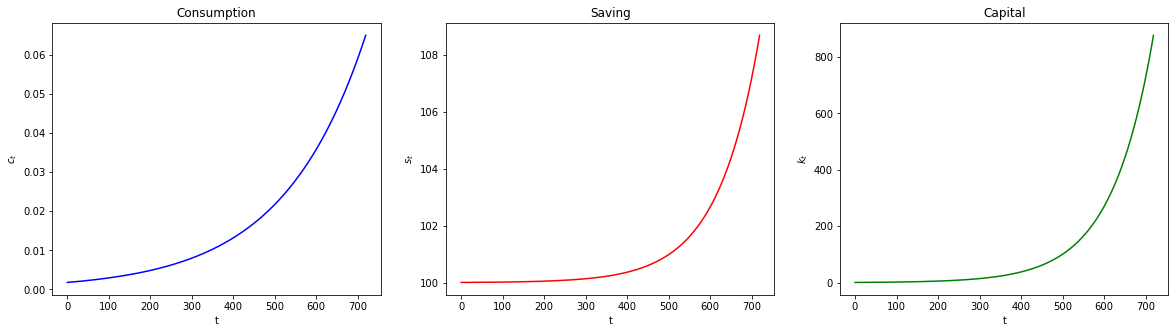

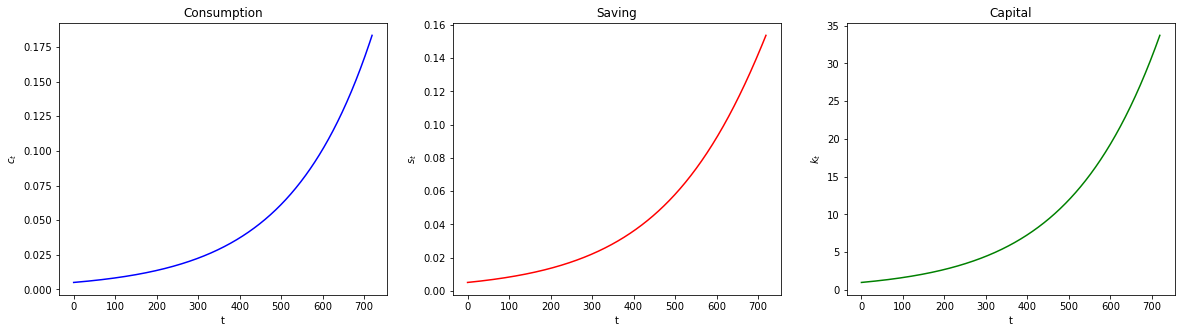

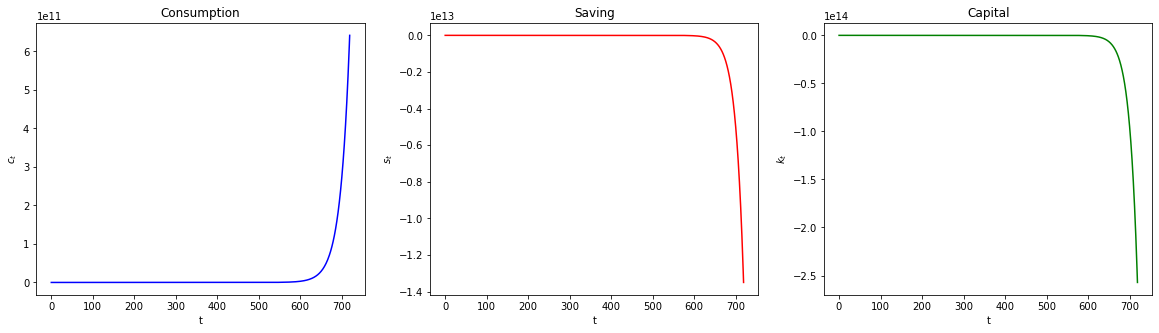

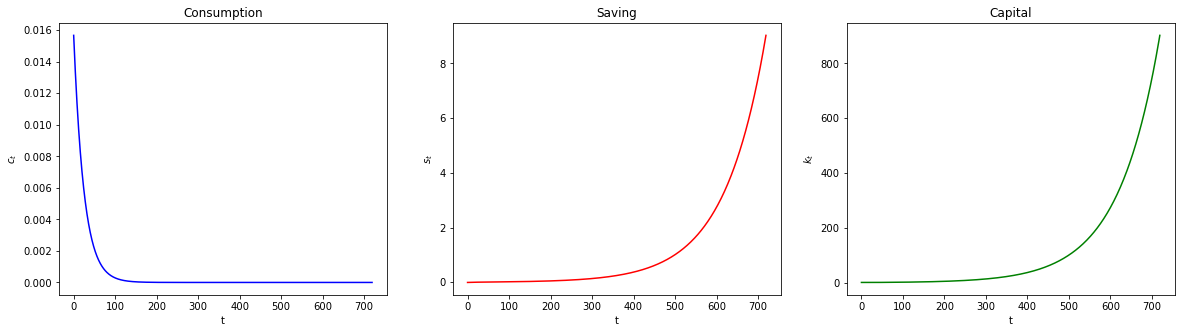

In [13]:
#Dariana Frolova, [17.10.2022 13:47]
# Task 3

# Introduce symbols
w, r, t, rho, inc = symbols('w r t rho inc')
# Introduce functions
c = Function('c')(t)
x = Function('x')(t)
mu = Function('mu')(t)

# 1. Hamiltonian
H = ln(c) + mu*(w + inc + r*x - c)
st1 = w + inc + r*x - c

# 2. FOC1 for the control variable c
foc1 = Eq(diff(H,c), 0).simplify()
c_s = solve(foc1,c)[0] # solve for c
eq = Eq(c,c_s)

# 3. FOC for the state variable x
mut = mu.diff()

foc2 = Eq(diff(H,x), rho*mu - mut).simplify()
mut_s = solve(foc2,mut)[0]
de1 = Eq(mut,mut_s)

# 4. Plug foc1 in the constraint st1
xt = x.diff()
xt2 = st1.subs(c, c_s)
de2 = Eq(xt, xt2)

# 5. Solve de1
ds1 = dsolve(Derivative(mu) - mu*(rho-r), mu)
ds_r = solve(ds1,mu)[0]

# 6. Rewrite de2
plug = de2.subs(mu,ds_r) 
int_factor = exp(-r*t)

lhs = -solve(plug,ds_r)[0]**(-1)*int_factor 
rhs = powsimp(-solve(ds1,mu)[0]**(-1)*int_factor) 

ds2 = Eq(lhs,rhs) # solve for the solution and multiply by int. factor

# Integrate rhs and simplify
C1, C2 = symbols('C1 C2')
rhs_integ = (simplify(integrate(rhs + w*int_factor,(t,0,t),
                                conds='separate'))+C2)*int_factor**-1 
solution1 = Eq(x,rhs_integ)

# 9. Solution for C2
x0, xT, T = symbols('x0 xT T')
sol2 = rhs_integ.subs(t,0)
sol2 = x0

# 10. Solution for C1
sol1 = rhs_integ.subs({t:T,C2:sol2})
sol1 = Eq(xT,sol1)
sol1 = solve(sol1, C1)[0]

# 11. Plug the solutions for constraints
x_sol = rhs_integ.subs({C1:sol1,C2:sol2})
x_sol

# From this derive consumption path
eq = eq.subs(mu,ds_r)
c_sol = eq.subs(C1,sol1)

# Savings
sav = st1.subs({x:x_sol,c:c_sol.rhs})
sav

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

param = [x0, xT, w, inc, T, r, rho]
values = [1, 100, 0, 0, 500, 0.01, 0.005] 
val = dict(zip(param,values))

val_new = [1, 100, 0, 100, 1000, 0.05, 0.05]

for i in range(1,len(val_new)):
    values = [1, 100, 0, 0, 500, 0.01, 0.005]
    values[i] = val_new[i]
    val = dict(zip(param,values))
    c = []
    x = []
    s = []
    for j in range(1,720+1):
        val[t] = j
        c.append(c_sol.rhs.subs(val))
        x.append(x_sol.subs(val))
        s.append(sav.subs(val))
    arr = np.array([c,s,x]).T
    col=['cons','sav','cap']
    exec("data"+str(i)+" = pd.DataFrame(arr, columns=col).astype('float')")

d = [data1,data2,data3,data4,data5,data6]
colors = ['blue', 'red', 'green']
titles = ['Consumption', 'Saving', 'Capital']
ylabels = ['$c_t$', '$s_t$', '$k_t$']
li =  ['cons','sav','cap']

for i in d:
    fig, axs = plt.subplots(1,3, figsize=(20, 5))
    for j in range(len(li)):
        a = li[j]
        axs[j].plot(i[a], c=colors[j])
        axs[j].set(xlabel='t', ylabel=ylabels[j], title=titles[j])    
    plt.show()